In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [3]:
def scatter_function(x_values, y_values, title, x_label, y_label):
    """Creates a scatter plot using Seaborn, with the following inputs:
    x-values, y-values, title, x-axis label, y-axis label"""
    plt.figure(figsize=(10,8))
    ax = sns.scatterplot(x_values, y_values, color = 'mediumblue')
    ax.set_xlim(x_values.min(), x_values.max())
    ax.set_ylim(y_values.min(), y_values.max())
    plt.title(title, fontsize = 18)
    plt.xticks(rotation = 45, fontsize = 14, horizontalalignment="right")
    plt.xlabel(x_label, fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.ylabel(y_label, fontsize = 18)
    plt.tight_layout()

In [4]:
weather_data_2017 = pd.read_csv('mpi_roof_2017a.csv', encoding='latin1')


In [5]:
weather_data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 22 columns):
Date Time               26064 non-null object
p (mbar)                26064 non-null float64
T (degC)                26064 non-null float64
Tpot (K)                26064 non-null float64
Tdew (degC)             26064 non-null float64
rh (%)                  26064 non-null float64
VPmax (mbar)            26064 non-null float64
VPact (mbar)            26064 non-null float64
VPdef (mbar)            26064 non-null float64
sh (g/kg)               26064 non-null float64
H2OC (mmol/mol)         26064 non-null float64
rho (g/m**3)            26064 non-null float64
wv (m/s)                26064 non-null float64
max. wv (m/s)           26064 non-null float64
wd (deg)                26064 non-null float64
rain (mm)               26064 non-null float64
raining (s)             26064 non-null float64
SWDR (W/m²)             26064 non-null float64
PAR (µmol/m²/s)         26064 non-null float64

In [6]:
weather_data_2017.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2017 00:10:00,999.77,-4.91,268.27,-8.41,76.3,4.24,3.23,1.00,2.01,...,0.78,1.56,184.0,0.0,0.0,0.0,0.0,0.0,7.10,434.3
1,01.01.2017 00:20:00,999.63,-5.05,268.13,-8.37,77.4,4.19,3.24,0.95,2.02,...,1.52,1.92,202.6,0.0,0.0,0.0,0.0,0.0,7.72,434.1
2,01.01.2017 00:30:00,999.54,-4.98,268.21,-8.38,76.9,4.21,3.24,0.97,2.02,...,0.98,1.78,227.4,0.0,0.0,0.0,0.0,0.0,8.77,430.4
3,01.01.2017 00:40:00,999.40,-4.88,268.33,-8.56,75.2,4.25,3.19,1.05,1.99,...,1.16,1.80,212.5,0.0,0.0,0.0,0.0,0.0,9.36,430.6
4,01.01.2017 00:50:00,999.17,-5.17,268.06,-8.74,75.8,4.15,3.15,1.01,1.96,...,1.50,2.64,222.1,0.0,0.0,0.0,0.0,0.0,9.45,429.5


In [7]:
prediction_df = weather_data_2017[['Date Time', 'T (degC)', 'p (mbar)', 'sh (g/kg)', 'wv (m/s)']].copy()


In [8]:
prediction_df.head()


,Date Time,T (degC),p (mbar),sh (g/kg),wv (m/s)
0,01.01.2017 00:10:00,-4.91,999.77,2.01,0.78
1,01.01.2017 00:20:00,-5.05,999.63,2.02,1.52
2,01.01.2017 00:30:00,-4.98,999.54,2.02,0.98
3,01.01.2017 00:40:00,-4.88,999.40,1.99,1.16
4,01.01.2017 00:50:00,-5.17,999.17,1.96,1.50


In [9]:
prediction_df['date_time'] = pd.to_datetime(prediction_df['Date Time'], format='%d.%m.%Y %H:%M:%S')
prediction_df.drop(['Date Time'], axis = 1, inplace = True)
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 5 columns):
T (degC)     26064 non-null float64
p (mbar)     26064 non-null float64
sh (g/kg)    26064 non-null float64
wv (m/s)     26064 non-null float64
date_time    26064 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 1018.2 KB


In [10]:
prediction_df.drop_duplicates(keep = 'first', inplace  = True)

In [11]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26064 entries, 0 to 26063
Data columns (total 5 columns):
T (degC)     26064 non-null float64
p (mbar)     26064 non-null float64
sh (g/kg)    26064 non-null float64
wv (m/s)     26064 non-null float64
date_time    26064 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.2 MB


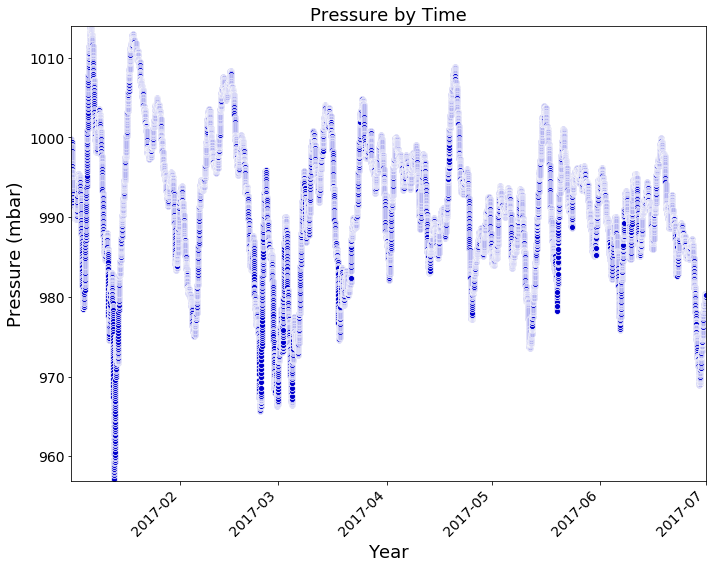

In [12]:
scatter_function(prediction_df['date_time'], prediction_df['p (mbar)'], 'Pressure by Time', 'Year', 'Pressure (mbar)')


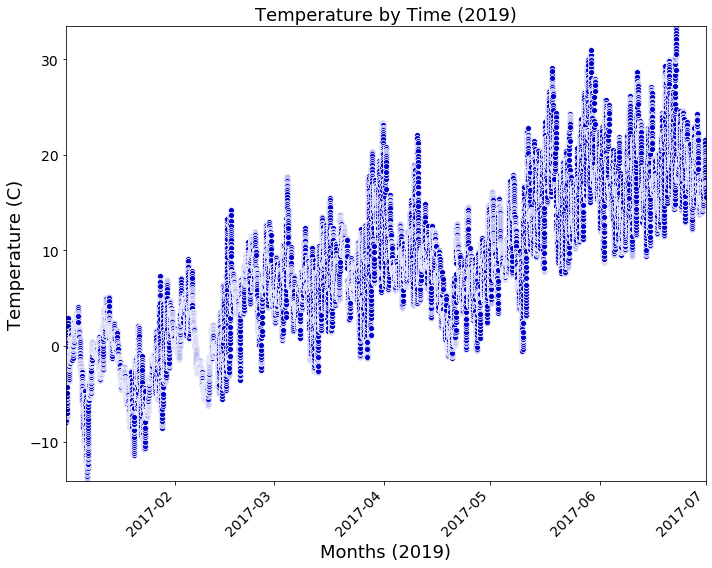

In [13]:
scatter_function(prediction_df['date_time'], prediction_df['T (degC)'], 'Temperature by Time (2019)', 'Months (2019)', 'Temperature (C)')


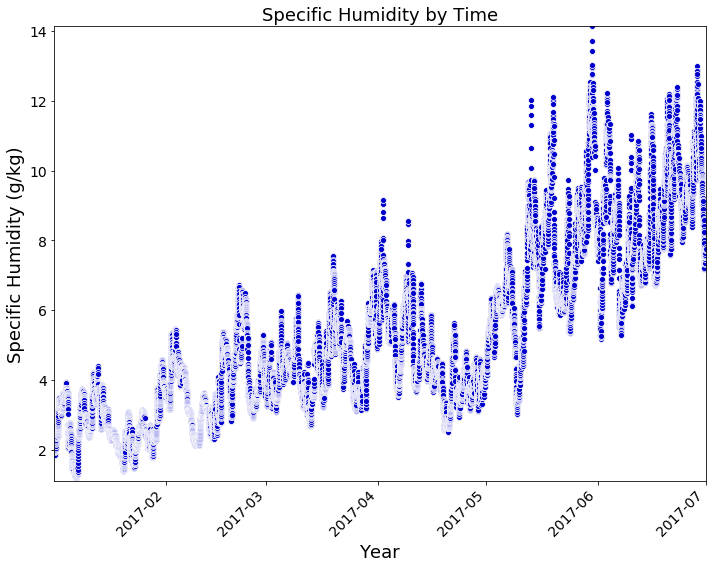

In [14]:
scatter_function(prediction_df['date_time'], prediction_df['sh (g/kg)'], 'Specific Humidity by Time', 'Year', 'Specific Humidity (g/kg)')


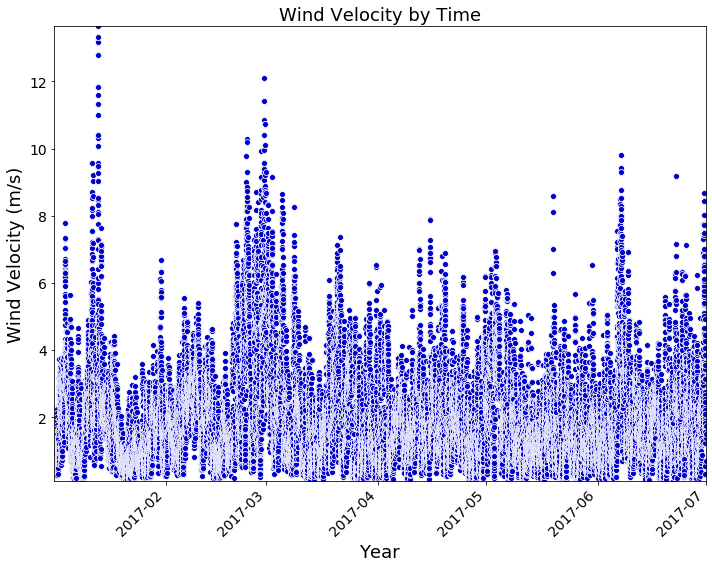

In [15]:
scatter_function(prediction_df['date_time'], prediction_df['wv (m/s)'], 'Wind Velocity by Time', 'Year', 'Wind Velocity (m/s)')


In [18]:
pred_date_range = prediction_df.iloc[:50].copy()

In [19]:
pred_date_range.reset_index(inplace = True)
pred_date_range.drop('index', axis = 1, inplace = True)

In [22]:
pred_date_range.head()

,T (degC),p (mbar),sh (g/kg),wv (m/s),date_time
0,-4.91,999.77,2.01,0.78,2017-01-01 00:10:00
1,-5.05,999.63,2.02,1.52,2017-01-01 00:20:00
2,-4.98,999.54,2.02,0.98,2017-01-01 00:30:00
3,-4.88,999.40,1.99,1.16,2017-01-01 00:40:00
4,-5.17,999.17,1.96,1.50,2017-01-01 00:50:00


In [23]:
pred_date_range.to_csv('2017_weather_conditions', index = False)